In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Pokemon.csv', encoding='ISO-8859-1', index_col=0)

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


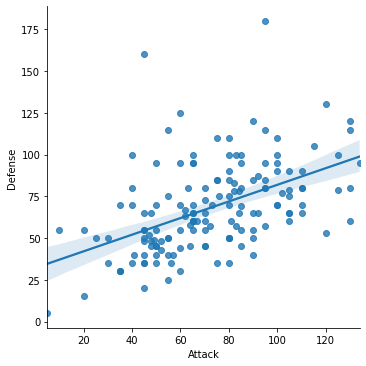

In [4]:
#function for regression line
sns.lmplot(x='Attack', y='Defense', data=df)

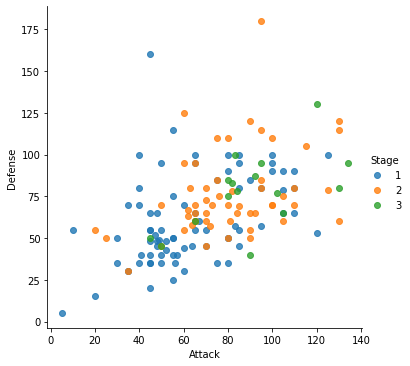

In [5]:
# tweak arguments
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')

(0.0, 188.75)

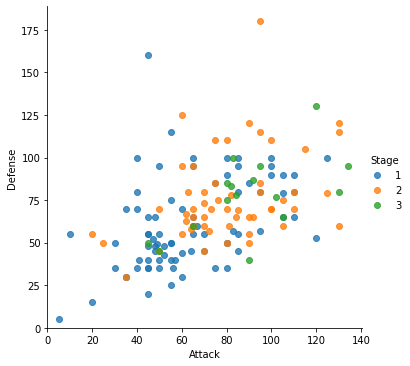

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')
# tweak axis with plt
plt.xlim(0, None)
plt.ylim(0, None)

<AxesSubplot:>

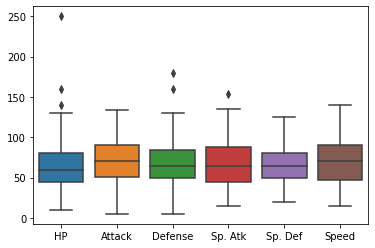

In [7]:
# prearrange data in pandas
stats = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
# boxplot
sns.boxplot(data=stats)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

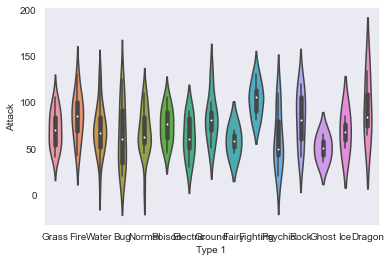

In [8]:
# set new style
sns.set_style('dark')
# create violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [9]:
# set color palettes with ordered Python list
sns.set_style('whitegrid')

# create list
colors = [
            '#78C850',
            '#F08030',
            '#6890F0',
            '#A8B820',
            '#A8A878',
            '#A040A0',
            '#F8D030',
            '#E0C068',
            '#EE99AC',
            '#C03028',
            '#F85888',
            '#B8A038',
            '#705898',
            '#98D8D8',
            '#7038F8'
        ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

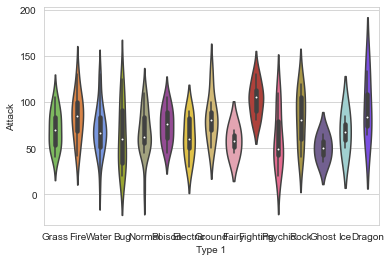

In [10]:
# violin plot with custom palette
sns.violinplot(x= 'Type 1', y= 'Attack', data=df, palette = colors)

/Users/elmira/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

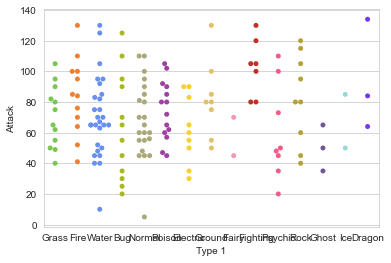

In [11]:
# create swarmplot with individual points
sns.swarmplot(x= 'Type 1', y= 'Attack', data=df, palette = colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

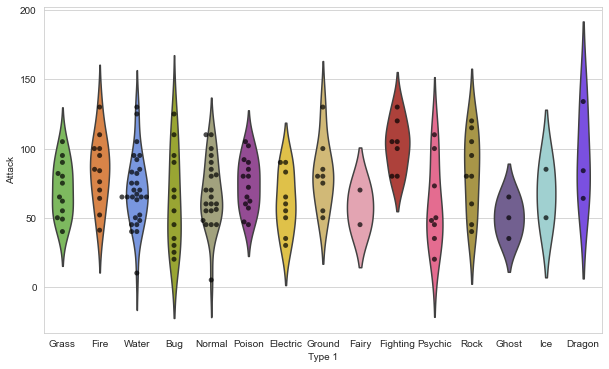

In [12]:
# combine plots

#set figure size
plt.figure(figsize=(10, 6))

# create plots
sns.violinplot(x= 'Type 1', y= 'Attack', data=df, inner=None, palette = colors, alpha=0.7)
sns.swarmplot(x= 'Type 1', y= 'Attack', data=df, color='k', alpha=0.7)



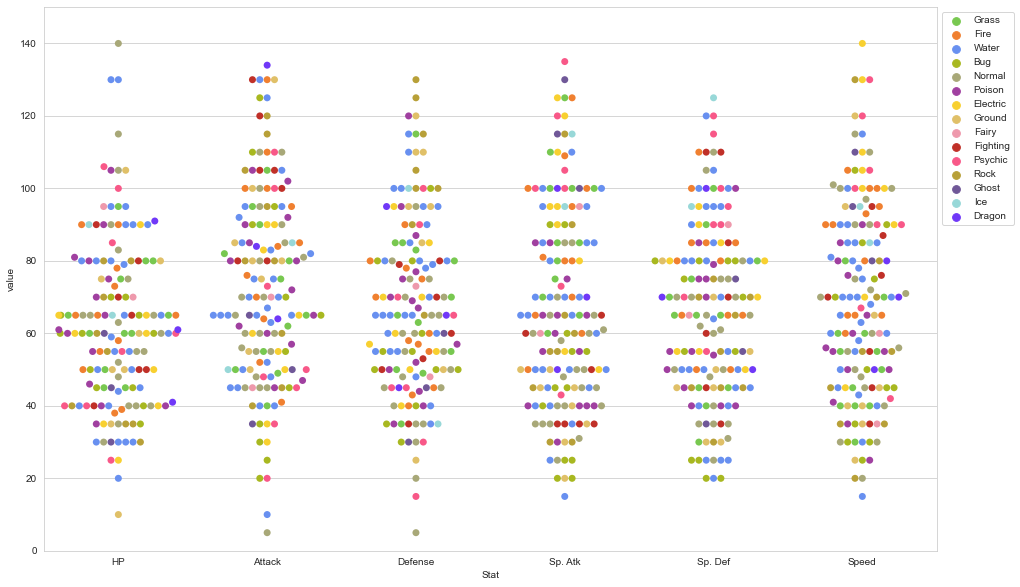

In [13]:
# melt df
melted = pd.melt(stats, id_vars= ['Name', 'Type 1', 'Type 2'], var_name='Stat')

# swarmplot with melted df
plt.figure(figsize=(16, 10))

sns.swarmplot(x= 'Stat', y='value', data= melted, hue='Type 1', palette = colors, s=7)
# set y lim
plt.ylim(0, 150)

# place the legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

<AxesSubplot:>

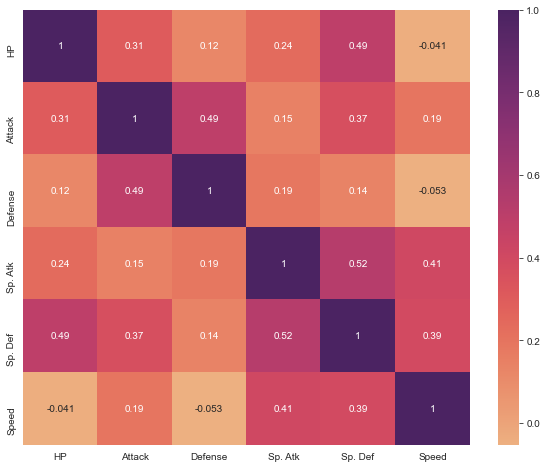

In [14]:
# calculation
corr = stats.corr()

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'flare')

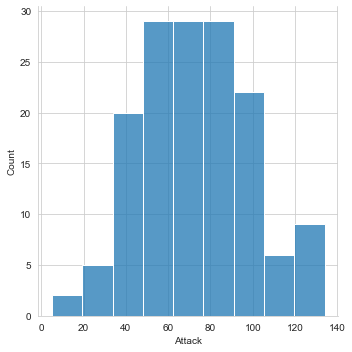

In [17]:
# create histogram
sns.displot(df['Attack'])

Text(0, 0.5, 'count')

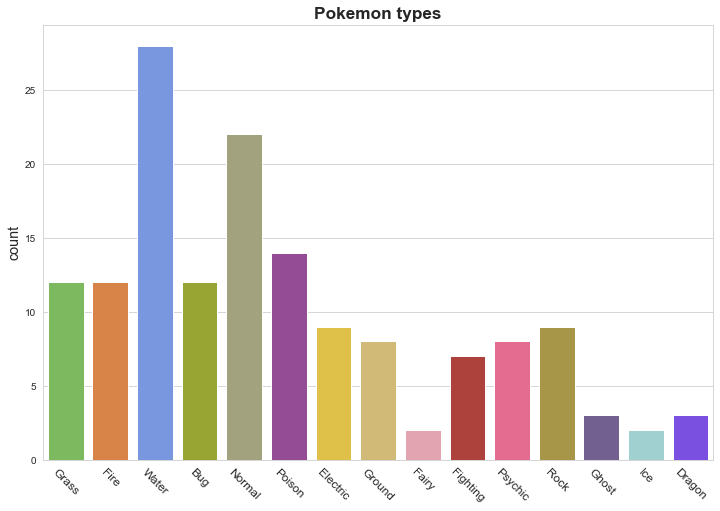

In [34]:
plt.figure(figsize=(12, 8))
# create barplot
sns.countplot(x='Type 1', data=df, palette = colors)

#rotate x-ticks
plt.xticks(rotation=-45, fontsize='large')
plt.title('Pokemon types', fontdict = {'fontsize': 'xx-large',
 'fontweight' : 'bold',
 'verticalalignment': 'baseline'})
plt.xlabel('')
plt.ylabel('count', fontsize='x-large')

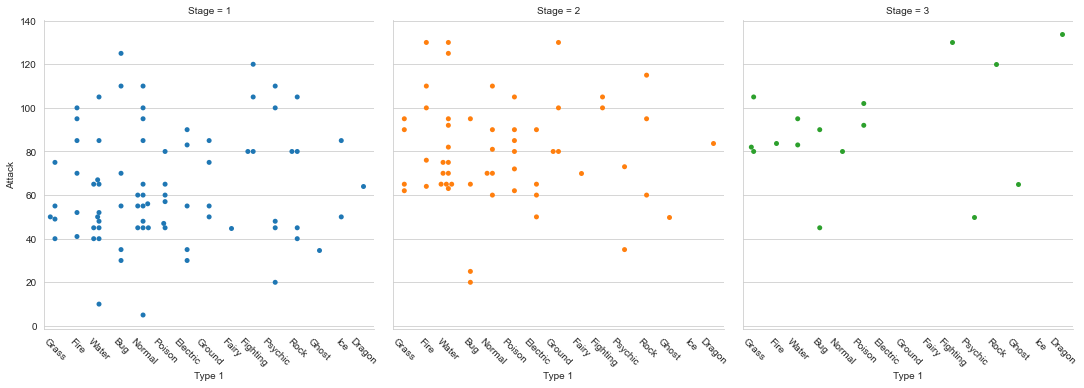

In [45]:
# factor plot
g = sns.catplot(x='Type 1', y= 'Attack', data=df, hue='Stage', col='Stage', kind='swarm')

#rotate x labels
g.set_xticklabels(rotation=-45)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

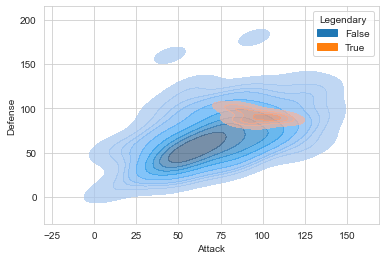

In [51]:
# density plot
sns.kdeplot(data=df, x='Attack', y='Defense', hue='Legendary', fill=True, alpha=0.7)

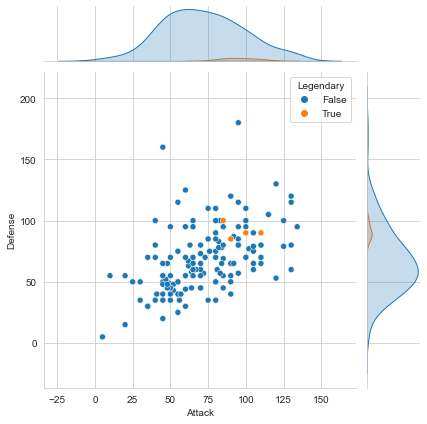

In [55]:
#joint distribution plot
sns.jointplot(x='Attack', y='Defense', data=df, hue='Legendary')

In [11]:
from numpy.random import randint, seed

equal_distances = 0

for x in range(5):
    seed(x)
    dist = randint(0, 1000, size=10)
    mean_p = sum(dist)/len(dist)
    below = 0
    above = 0
    print(dist)
    for i in dist:
        if i == mean_p:
            continue
        if i < mean_p:
            s = mean_p - i
            below += round(s, 1)
            print('Below: ', below)
        else:
            s = i - mean_p
            above += round(s, 1)
            print('Above: ', above)
    
    if above == below:
        equal_distances += 1
        print(equal_distances)
print(equal_distances)

[684 559 629 192 835 763 707 359   9 723]
Above:  138.0
Above:  151.0
Above:  234.0
Below:  354.0
Above:  523.0
Above:  740.0
Above:  901.0
Below:  541.0
Below:  1078.0
Above:  1078.0
1
[ 37 235 908  72 767 905 715 645 847 960]
Below:  572.1
Below:  946.2
Above:  298.9
Below:  1483.3000000000002
Above:  456.79999999999995
Above:  752.6999999999999
Above:  858.5999999999999
Above:  894.4999999999999
Above:  1132.3999999999999
Above:  1483.2999999999997
[168 527 493 584 534 299 466  75 360 263]
Below:  208.9
Above:  150.1
Above:  266.2
Above:  473.29999999999995
Above:  630.4
Below:  286.8
Above:  719.5
Below:  588.7
Below:  605.6
Below:  719.5
2
[874 664 249 643 952 968 256 789 659 714]
Above:  197.2
Below:  12.8
Below:  440.6
Below:  474.40000000000003
Above:  472.4
Above:  763.5999999999999
Below:  895.2
Above:  875.8
Below:  913.0
Above:  913.0
3
[122 174 439 709 897 360 599 456 818 393]
Below:  374.7
Below:  697.4
Below:  755.1
Above:  212.3
Above:  612.6
Below:  891.8
Above:  714.9

In [5]:
equal_distances = 0

for i in range(5000):
    seed(i)
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1
print(equal_distances)

5000
